YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


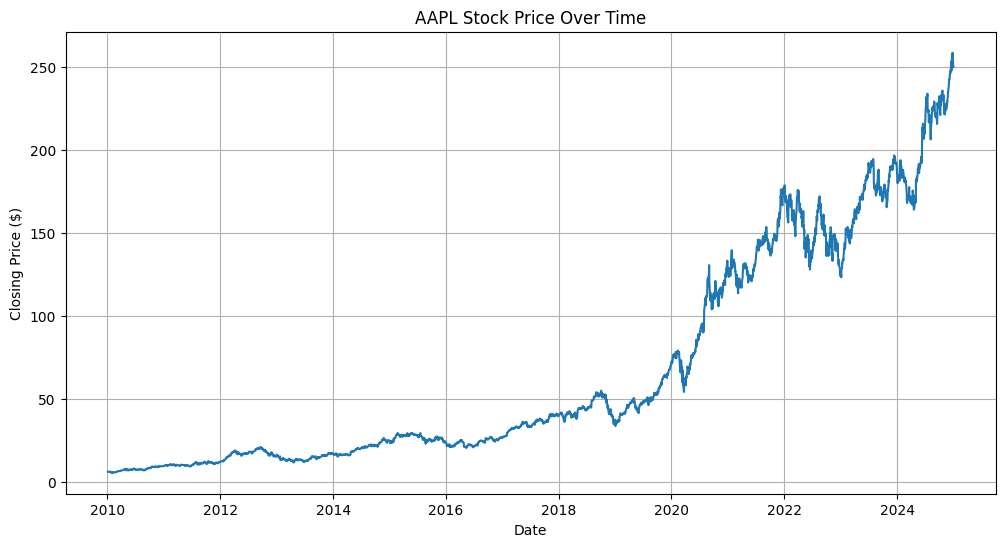

Mean Squared Error (MSE): 8.117032719829846


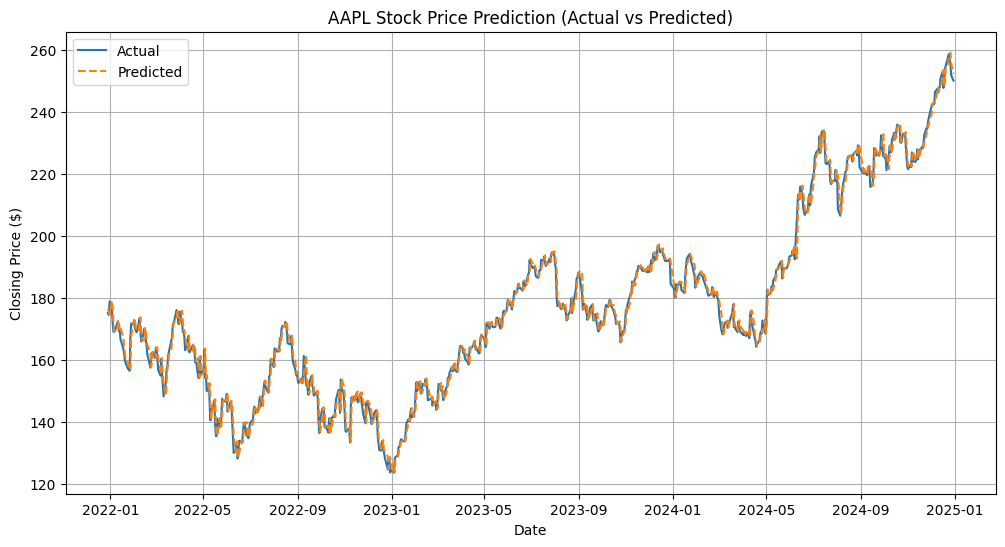

Predicted closing price for AAPL tomorrow: $252.33


In [1]:
# Google Colab Notebook for Financial Analysis and Stock Prediction

# Step 1: Install necessary libraries
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

# Step 2: Import the required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 3: Download historical stock data
# Let's take the example of Apple's stock data (AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Display the first few rows of the data
data.head()

# Step 4: Data Preprocessing and Visualization
# Plot the closing price over time
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

# Step 5: Feature Engineering
# We will use the 'Close' price to predict the future closing price
# Add a new column 'Target' for the next day's close price
data['Target'] = data['Close'].shift(-1)

# Drop the last row since it has a NaN value for 'Target'
data = data.dropna()

# Step 6: Split the data into training and testing sets
X = data[['Close']]  # Features (using 'Close' price)
y = data['Target']   # Target variable (next day's 'Close' price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Step 9: Plot the predicted vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction (Actual vs Predicted)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Future Price Prediction
# Predict the closing price for the next day using the last available data
last_day = data.iloc[-1:][['Close']]
predicted_price = model.predict(last_day)

print(f"Predicted closing price for {ticker} tomorrow: ${predicted_price[0]:.2f}")
